# 1. Explain features

## Index
time
Time of the readings, with a **time span of 1 minute,** all timestamps are presented in **UNIX system**
## Energy Usage

### General
use [kW] Total energy consumption  
gen [kW] Total energy generated by means of solar or other power generation resources  
House overall [kW] overall house energy consumption 

### Appliances 
Dishwasher [kW] energy consumed by specific appliance  
Furnace 1 [kW] energy consumed by specific appliance  
Furnace 2 [kW] energy consumed by specific appliance  
Home office [kW] energy consumed by specific appliance  
Fridge [kW] energy consumed by specific appliance  
Wine cellar [kW] energy consumed by specific appliance  
Garage door [kW] energy consumed by specific appliance  
Microwave [kW] energy consumed by specific appliance  
Barn [kW] energy consumed by specific appliance  
Well [kW] energy consumed by specific appliance  

### Rooms
Kitchen 12 [kW] energy consumption in kitchen 1  
Kitchen 14 [kW] energy consumption in kitchen 2  
Kitchen 38 [kW] energy consumption in kitchen  
Living room [kW] energy consumption in Living room 

### Generated electricity
Solar [kW] Solar power generation  

## Weather
**temperature:**
temperature is a physical quantity expressing hot and cold. 

**humidity:**
Humidity is the concentration of water vapour present in air. 

**visibility:**
Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.  

**apparentTemperature:**

Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.

**pressure:**
Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather

**windSpeed:**
Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.

**cloudCover:**
Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.

**windBearing:**
In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."

**dewPoint:**
the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.

**precipProbability:**
A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.

**precipIntensity:**
The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.

# 2. Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot 
from sklearn.impute import KNNImputer

In [50]:
import piplite
await piplite.install('seaborn')
import seaborn as sb

In [4]:
df = pd.read_csv('HomeC.csv', low_memory =False)
# we do low memory because some columns have mixed data types and thus we don't want to import them with generalization
print(f'HomeC.csv : {df.shape}')
df.dtypes

HomeC.csv : (503911, 32)


time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

## 3.1 Deal with missing values


In [5]:
df.isnull().sum()
# fortunately, we have only one 1min in which we have missing values -> drop the row

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [6]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]
print(df.columns)
df_copy = df.copy()
print(df_copy.shape)



Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')
(503911, 32)


In [13]:
nan_rows = np.where(df.isnull().any(axis=1))[0]


array([503910], dtype=int32)

In [15]:
df_copy = df_copy.dropna()

In [24]:
#let's change the index from timestamp to standard Y-М-D
time_index = pd.date_range('2016-01-01 05:00', periods=len(df_copy),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df_copy = df_copy.set_index(time_index)
dataset = df_copy.drop(['time'], axis=1)


<AxesSubplot:>

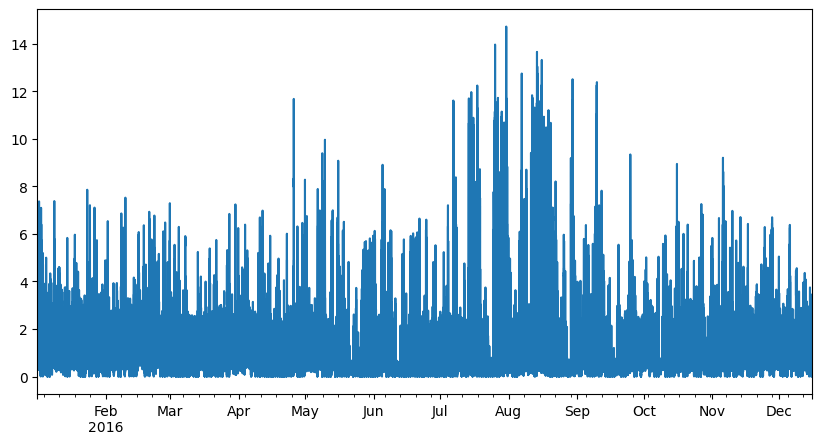

In [27]:
df_copy['use'].plot(figsize=(10,5))


<AxesSubplot:>

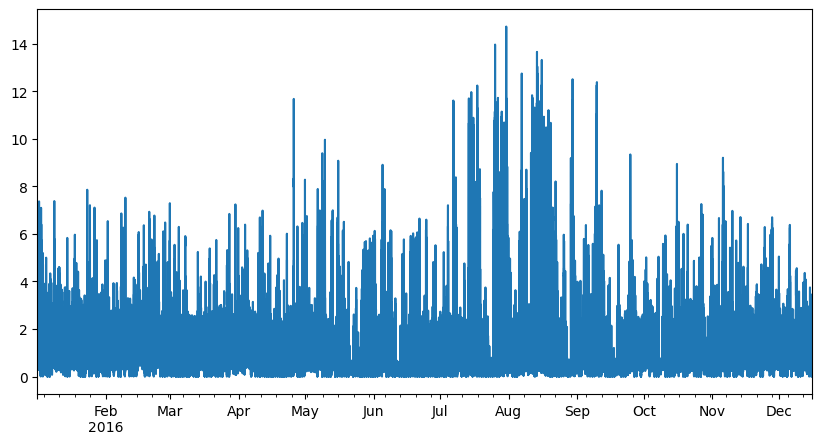

In [28]:
df_copy['House overall'].plot(figsize=(10,5))

In [32]:
# House overall and use contain the same information => let's remove 'House overall'
df_copy = df_copy.drop('House overall', axis =1)


<class 'KeyError'>: "['House overall'] not found in axis"

In [20]:
#check for normal distribution
def ShTest(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    gaussian_cols =[]
    nongaussian_cols=[]
    for i in num_cols:
        p_value = float(shapiro(df[i])[0])
        if p_value > 0.05:
            gaussian_cols.append(i) 
        elif p_value <= 0.05:
            nongaussian_cols.append(i) 
            
    return [gaussian_cols, nongaussian_cols]

ShTest(df_copy)[1]



['Microwave']

In [38]:
#check for missing values
for i in df_copy.columns:
    print(f'Column name:{i}')
    print(f'{df_copy[i].unique()}\n')

Column name:time
['1451624400' '1451624401' '1451624402' ... '1452128307' '1452128308'
 '1452128309']

Column name:use
[0.93283333 0.93433333 0.93181667 ... 1.9344     1.55181667 1.92426667]

Column name:gen
[0.00348333 0.00346667 0.00343333 ... 0.25275    0.1532     0.2099    ]

Column name:Dishwasher
[3.33000000e-05 0.00000000e+00 1.67000000e-05 ... 1.37925000e+00
 1.36833333e+00 1.13683333e+00]

Column name:Furnace 1
[0.0207     0.02071667 0.1069     ... 0.2539     0.18971667 0.35916667]

Column name:Furnace 2
[0.06191667 0.06381667 0.06231667 ... 0.55215    0.5292     0.3511    ]

Column name:Home office
[0.44263333 0.44406667 0.44606667 ... 0.26505    0.23316667 0.37808333]

Column name:Fridge
[0.12415    0.124      0.12353333 ... 0.07871667 0.06008333 0.05338333]

Column name:Wine cellar
[0.00698333 0.00685    0.00671667 ... 0.09773333 0.05885    0.05846667]

Column name:Garage door
[0.01308333 0.01311667 0.013      ... 0.1201     0.1993     0.0168    ]

Column name:Kitchen 12
[4

In [86]:
#bfil gets the non-nan value and puts it in nan-value position (the value before)
# inplace modifes the dataset /doesn't create new df/
df_copy['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df_copy['cloudCover'] = df_copy['cloudCover'].astype('float')

In [92]:

df_copy=df_copy.drop(['time','summary','icon'],axis=1)
df_copy.info()                    

<class 'KeyError'>: "['time', 'summary', 'icon'] not found in axis"

# 3.2 Deal with outliers
# 3.2.1 Detection

In [105]:
# We saw that electricity consumption is gaussian. Let's check, because Z-score can helps us in such case
def z_score_outliers(array):
    z_scores = zscore(array)
    outliers = (z_scores < -2.5) | (z_scores > 2.5)
    
    print(f'Outlier portion: {np.round(array[outliers].count()/array.count(),4)*100}%')
    return array[outliers]
#now we remove the non-gaussian column, as Z-score requires normal distribution
features_z =['use','gen','House overall']
df_z = df_copy.drop('Microwave', axis =1)
outliers_z = pd.DataFrame(z_score_outliers(df_z[features_z]))
#we see over 14k+ outliers

Outlier portion: use              2.94
gen              4.27
House overall    2.94
dtype: float64%


In [56]:
df_copy['temperature'].describe()

count    503910.000000
mean         50.741935
std          19.113807
min         -12.640000
25%          35.770000
50%          50.320000
75%          66.260000
max          93.720000
Name: temperature, dtype: float64

In [95]:
(outliers['time'].count())/(df_copy['time'].count())
outliers_IF.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'scores', 'anomaly'],
      dtype='object')

In [89]:
#We got huge difference between z-score and IsolationForests. This means we have to use domain knowledge. 
# High power consuming 2.3 times out of 10 (2.3 days in 10 days) is relatively uncommon
# This means we have to trust the Z-score (0.3 days in 10 days) but still, let's see how many points are common to both detectors
common_indices = [i for i in outliers_z.index if i in outliers_IF.index]
Zoutliers_in_IF = pd.DataFrame(outliers_IF.loc[common_indices])

#(Zoutliers_in_IF.sort_values(by='time')).equals(outliers_z.sort_values(by='time'))

Index(['use'], dtype='object')

# 4. EDA

<AxesSubplot:>

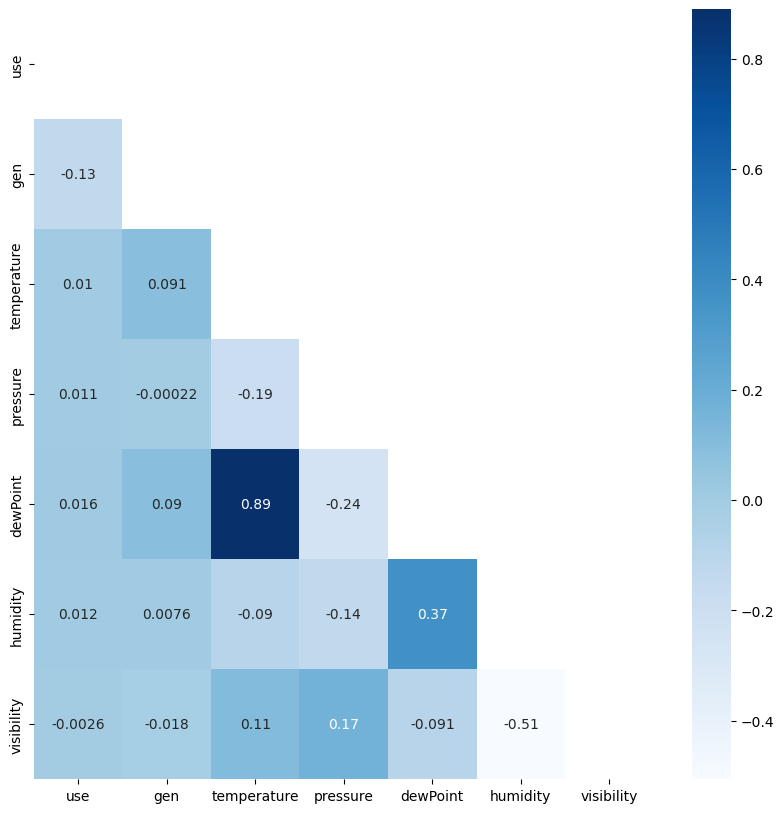

In [57]:
#since all features are continuous in kW (not categorical), let's calculate the pearson correlation


# Define the features you want to include in the heatmap

# Subset the DataFrame to include only those columns corresponding to the features
df_subset = df_copy[['use','gen','temperature','pressure','dewPoint','humidity','visibility']]

# Compute the correlation matrix and create a mask to hide the upper triangle
corr = df_subset.corr(method='pearson')
mask = np.triu(np.ones_like(corr))

# Create the heatmap using the subsetted DataFrame and masked correlation matrix
fig = pyplot.figure(figsize=(10,10))
sb.heatmap(corr, annot=True, mask=mask, cmap='Blues')

#No apparent correlations between temperature and power usage


[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'LR Usage (kW)')]

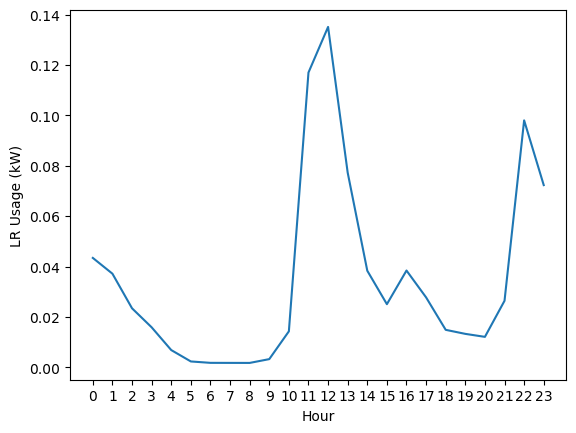

In [95]:
df_copy.resample('H').mean()
df_copy.groupby(df_copy.index.hour).mean()['Living room'].plot(xticks=np.arange(24)).set(xlabel='Hour', ylabel='LR Usage (kW)')


[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Kitchens usage (kW)')]

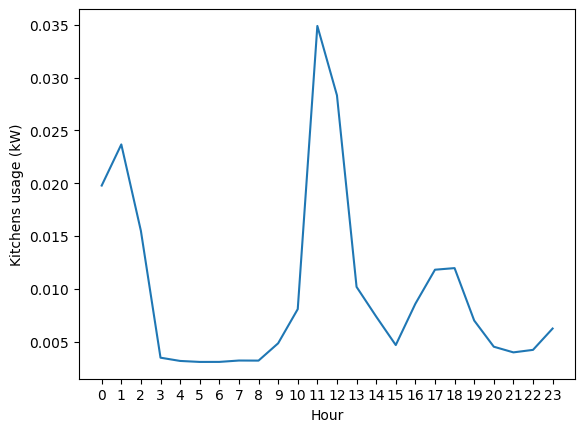

In [108]:

df_copy['Kitchens'] = df_copy['Kitchen 12'] + df_copy['Kitchen 38'] + df_copy['Kitchen 14'] 

df_copy.groupby(df_copy.index.hour).mean()['Kitchens'].plot(xticks=np.arange(24)).set(xlabel='Hour', ylabel='Kitchens usage (kW)')

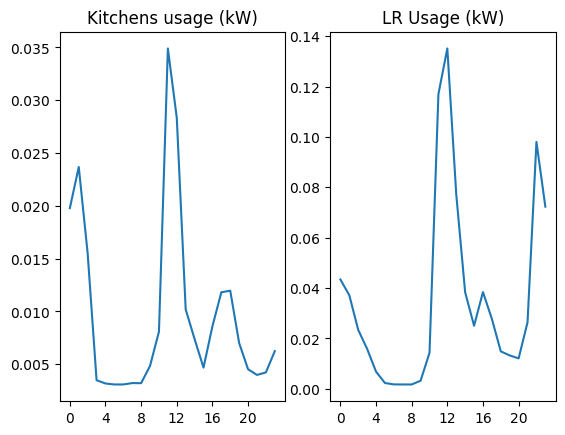

In [128]:
fig, (ax1, ax2) = pyplot.subplots(1, 2)


ax1.plot(np.arange(24),df_copy.groupby(df_copy.index.hour).mean()['Kitchens'])
ax1.set_title('Kitchens usage (kW)')
ax1.set_xticks(np.arange(0,24,4))

# plot the second subplot
ax2.plot(np.arange(24),df_copy.groupby(df_copy.index.hour).mean()['Living room'])
ax2.set_title('LR Usage (kW)')
ax2.set_xticks(np.arange(0,24,4))




# show the plot
pyplot.show()

# people are asleep between 2AM to 8AM

## Modeling